# Machine Learning pipeline


**Quelle**: A. Geron: https://github.com/ageron/handson-ml

## I. Setup

In [2]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## I. Setup



### 1) Importiere und inspiziere die Daten 

In [3]:
import pandas as pd

house_prices_df = pd.read_csv("./resources/house_prices.csv")


In [69]:
# Select only object columns
object_columns = house_prices_df.select_dtypes(include=['object']).columns

# Fill null values in object columns
house_prices_df[object_columns] = house_prices_df[object_columns].fillna('not_applicable')

numeric_columns = house_prices_df.select_dtypes(include=['float64', 'int64']).columns

# Fill null values in numeric columns with their respective median values
for col in numeric_columns:
    house_prices_df[col].fillna(house_prices_df[col].median(), inplace=True)

C:\Users\timon\AppData\Local\Temp\ipykernel_14664\3047332796.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_prices_df[col].fillna(house_prices_df[col].median(), inplace=True)
C:\Users\timon\AppData\Local\Temp\ipykernel_14664\3047332796.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [4]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [71]:
house_prices_df.to_csv("./resources/house_prices_df.csv", index=False)

In [72]:
house_prices_df = pd.read_csv("./resources/house_prices_df.csv")
house_prices_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,not_applicable,Reg,Lvl,AllPub,Inside,...,0,not_applicable,not_applicable,not_applicable,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,not_applicable,Reg,Lvl,AllPub,FR2,...,0,not_applicable,not_applicable,not_applicable,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,not_applicable,IR1,Lvl,AllPub,Inside,...,0,not_applicable,not_applicable,not_applicable,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,not_applicable,IR1,Lvl,AllPub,Corner,...,0,not_applicable,not_applicable,not_applicable,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,not_applicable,IR1,Lvl,AllPub,FR2,...,0,not_applicable,not_applicable,not_applicable,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,not_applicable,Reg,Lvl,AllPub,Inside,...,0,not_applicable,not_applicable,not_applicable,0,6,2006,WD,Normal,90500.0
2915,160,RM,21.0,1894,Pave,not_applicable,Reg,Lvl,AllPub,Inside,...,0,not_applicable,not_applicable,not_applicable,0,4,2006,WD,Abnorml,71000.0
2916,20,RL,160.0,20000,Pave,not_applicable,Reg,Lvl,AllPub,Inside,...,0,not_applicable,not_applicable,not_applicable,0,9,2006,WD,Abnorml,131000.0
2917,85,RL,62.0,10441,Pave,not_applicable,Reg,Lvl,AllPub,Inside,...,0,not_applicable,MnPrv,Shed,700,7,2006,WD,Normal,132000.0


--> Info über die Merkmale, falls keine Metadaten vorliegen + Check, ob Import erfolgreich war

In [51]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


--> 
* 20640 Datensätze
* Mermal "total_bedrooms" hat offenbar fehlende Werte (missing values)
* Alle Merkmale + Zielvariable sind numerisch. Lediglich "ocean_proximity" ist vom Typ object


In [52]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

--> Das Merkmal "ocean_proximity" hat fünf verschiedene Ausprägungen, die aber keine ordinale Bedeutung haben 

In [53]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


-->
* Wesentliche stat. Kennzahlen: Mittelwert, Standardabweichung, Min, Max, Quantile 
* Note: Fehlende Werte werden ignoriert und nicht als 0 gewertet

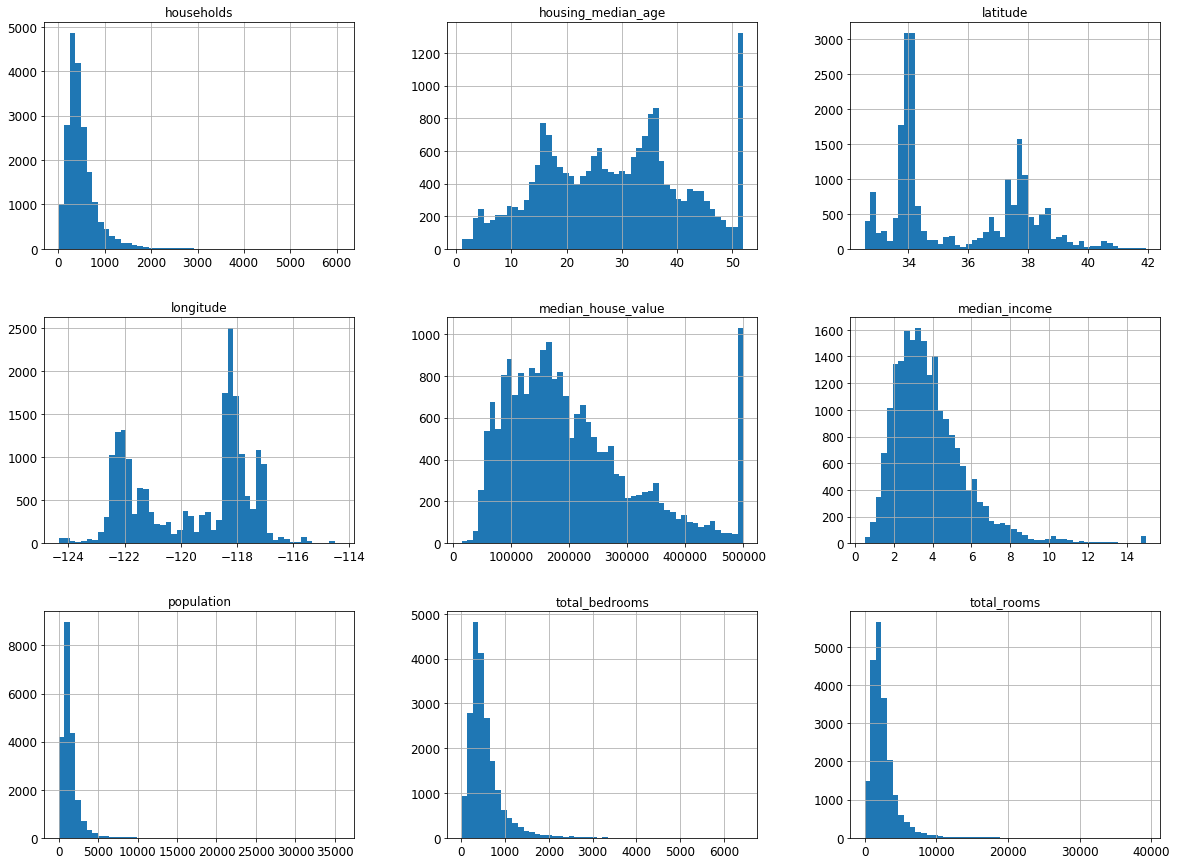

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Aufgabe 

Untersuche die Daten nach Aufälligkeiten; benutze dafür statistische Kennzahlen aber auch weitere Plots 

Was lässt sich über die Daten sagen ? 

### Lösung

* Die Merkmale habe zT sehr unterschiedliche Dimensionen 
* Einige Merkmale könnten Ausreisser haben (schiefe Verteilung mit long tail)
* Das Merkmal "median_income" stellt offenbar nicht das Einkommen in $ dar, sondern skalierte Were
* Einige Merkmale wurden offenbar gekappt ("cencored Data")
* Die Verteilung der Merkmale ist nur selten "normal" 



### 2.1) Aufteilung in Training- und Teststichprobe 

In [55]:
# to make this notebook's output identical at every run
np.random.seed(42)

-->
Damit das Vorgehen reprozuzierbar ist, sollte der Seed für die Zufallszahlen festgelegt werden

In [56]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [57]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [58]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [59]:
## Alternative mit sklearn
## sklearn ist eine Python-Bibliothek speziell für Machine Learning 


from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=123)

In [60]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19121,-122.64,38.24,40.0,1974.0,410.0,1039.0,398.0,3.7917,151600.0,<1H OCEAN
20019,-119.05,36.09,9.0,3297.0,568.0,1749.0,568.0,4.0217,99200.0,INLAND
15104,-116.98,32.85,12.0,3570.0,713.0,3321.0,666.0,4.0882,134500.0,<1H OCEAN
3720,-118.42,34.20,27.0,3201.0,970.0,3403.0,948.0,2.2377,231700.0,<1H OCEAN
8938,-118.47,34.01,41.0,2704.0,557.0,1047.0,478.0,4.4211,462900.0,<1H OCEAN


In [61]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16340.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.566976,35.627757,28.570918,2648.943193,541.041493,1434.115734,502.672844,3.870716,206968.729530
std,2.000519,2.134543,12.582281,2208.372267,427.316722,1130.309986,387.541495,1.900132,115414.844601
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1453.000000,297.000000,789.000000,280.000000,2.562500,119400.000000
50%,-118.490000,34.250000,29.000000,2138.500000,438.000000,1170.000000,412.000000,3.529400,180400.000000
75%,-118.010000,37.710000,37.000000,3158.000000,650.000000,1735.000000,608.000000,4.750375,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [62]:
test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.000000,4128.000000,4128.000000,4128.000000,4093.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.580618,35.648278,28.913760,2583.042636,525.211581,1390.920785,487.007025,3.870493,206404.166424
std,2.015744,2.141762,12.596449,2070.552090,396.619710,1140.513443,360.503370,1.898811,115331.538260
min,-124.260000,32.560000,2.000000,21.000000,3.000000,14.000000,5.000000,0.499900,17500.000000
25%,-121.792500,33.940000,19.000000,1433.000000,294.000000,782.000000,278.000000,2.572850,119975.000000
50%,-118.500000,34.270000,29.000000,2086.000000,423.000000,1153.000000,398.000000,3.559750,178050.000000
75%,-117.990000,37.730000,37.000000,3088.000000,632.000000,1690.000000,588.000000,4.708950,264750.000000
max,-114.580000,41.920000,52.000000,25135.000000,4819.000000,35682.000000,4769.000000,15.000100,500001.000000


Durch die zufällige Aufteilung in Training- und Teststichprobe kann es vorkommen, dass die Verteilungen einzelner Merkmale (stark) unterschiedlich ist in Training-, Test- und Gesamtstichprobe. Ist das Modellergebnis sensitiv auf diese Verteilung, dann kann dies zu einer Verzerrung führen --> Argument für sog. "stratified sample".

### 3) Erkunde und visualisiere die Daten, um Erkenntnisse zu gewinnen (EDA)

In [63]:
housing = train_set.copy()

--> Housing ist eine Kopie des Trainingsdatensatzes und wird für die EDA verwendet

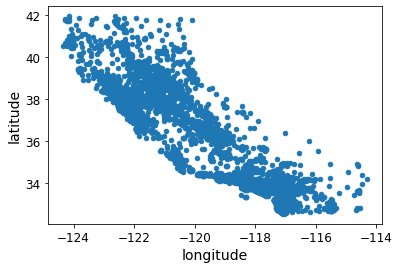

In [64]:
housing.plot(kind="scatter", x="longitude", y="latitude")

--> Da in den Daten Längen- und Breitengrad Merkmale sind, ähnelt der Scatterplot bereits Kalifornien :-) 

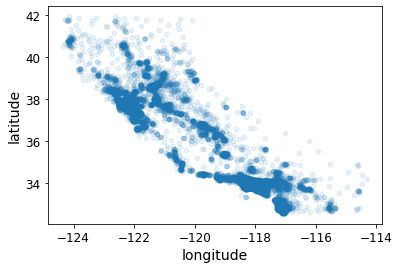

In [65]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # alpha: Deckkraft


--> Durch die Verwendung des Parameters alpha=0.1 werden die Datenpunkte transparenter gezeichnet, so dass Häufungen besser erkennbar sind. Nämlich ? 

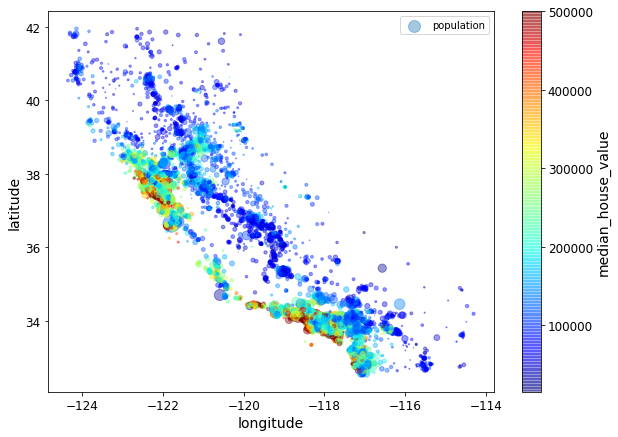

In [66]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

-->
In diesem Scatterplot wird die Größe der Datenpunkte gemäß Bevölkerungshohe angezeigt; die Farbe des Datenpunktes entsprechend des Hauspreises im Datensatz.

Erkenntnis: 
In Küstennähe und in Ballungszentren ind die Immobilienhäuser idR höher 

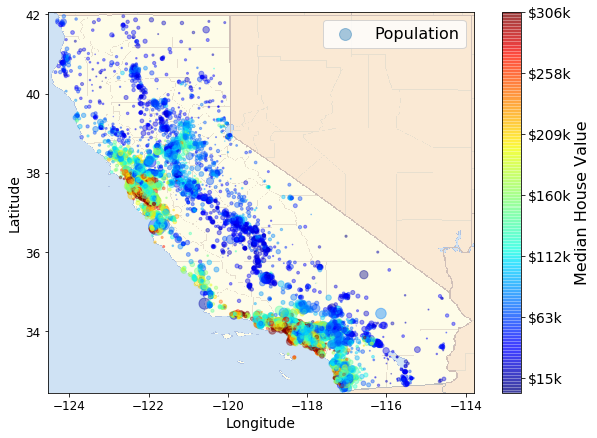

In [67]:
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

--> 
Wenn ein Bild von Kalifornien (in einem bestimmten Format) vorhanden ist, kann man dieses der Grafik unterlegen und vglw. einfach
sehr professionell wirkende Visualisierungen erstellen.

In [68]:
corr_matrix = housing.corr()

In [69]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924720,-0.107313,0.050710,0.073164,0.103523,0.059470,-0.011739,-0.038349
latitude,-0.924720,1.000000,0.010405,-0.042307,-0.071123,-0.112544,-0.075068,-0.083397,-0.150574
housing_median_age,-0.107313,0.010405,1.000000,-0.361528,-0.322509,-0.302180,-0.305194,-0.122520,0.099487
total_rooms,0.050710,-0.042307,-0.361528,1.000000,0.930047,0.865105,0.919424,0.198930,0.132965
total_bedrooms,0.073164,-0.071123,-0.322509,0.930047,1.000000,0.885922,0.981040,-0.006547,0.048823
population,0.103523,-0.112544,-0.302180,0.865105,0.885922,1.000000,0.913154,0.007101,-0.024484
households,0.059470,-0.075068,-0.305194,0.919424,0.981040,0.913154,1.000000,0.014042,0.064043
median_income,-0.011739,-0.083397,-0.122520,0.198930,-0.006547,0.007101,0.014042,1.000000,0.688904
median_house_value,-0.038349,-0.150574,0.099487,0.132965,0.048823,-0.024484,0.064043,0.688904,1.000000


--> Volle Korrelationsmatrix. Insbesondere bei vielen Merkmalen kann diese sehr schnell unübersichtlich werden. 

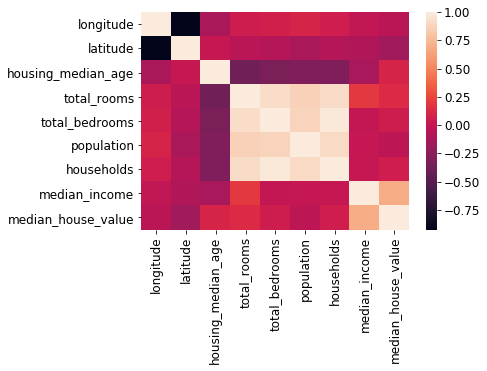

In [70]:
import seaborn as sns
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

--> 
Mit der Python Bibliothek Seaborn lässt sich die Korrelationsmatrix als Heatmap darstellen

In [71]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688904
total_rooms           0.132965
housing_median_age    0.099487
households            0.064043
total_bedrooms        0.048823
population           -0.024484
longitude            -0.038349
latitude             -0.150574
Name: median_house_value, dtype: float64

-->
#### Das Merkmal "median_income" ist offenbar am höchsten mit der Zielvariable korreliert und wird damit vermutlich eine wichtige Rolle im Modell spielen.

!! Bei EDA findet idR eine univariate Betrachtung statt; multivariat kann es durchaus noch zu Änderungen kommen !!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4F23606C8>,
      dtype=object)

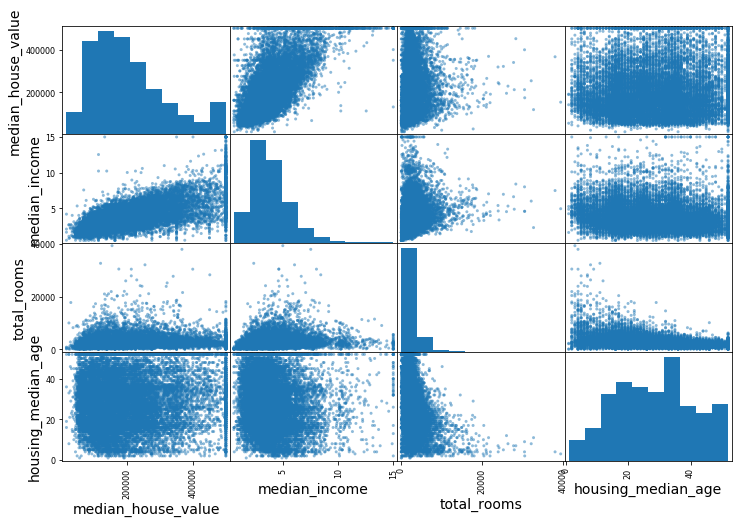

In [72]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


-->
Mit der Funktion Scatter-Matrix von Pandas lassen sich Abhängigkeiten zwischen den Merkmalen (und der Zielvariablen) ebenfalls analysieren. Auf der Hauptdiagonalen des Bildes wird statt der trivialen 1-Korrelation die Verteilung des Merkmals 
gezeigt. 

Auch hier zeigt sich, dass das Merkmal "median_income" offenbar das vielversprechendste Merkmal ist ! 


[0, 16, 0, 550000]

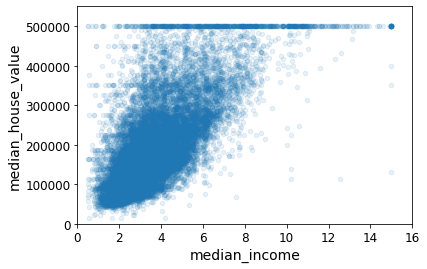

In [73]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])


-->
Es ist sichtbar, dass die Hauspreise bei 500.000 gekappt wurden; es finden sich aber des weiteren eine Linie bei 450K, bei 350K und bei 280K.

Ggf. wurden weitere Kappungen (vielleicht nur bei einzelnen Bezirken) durchgeführt. Hier wäre in der Praxis zu überlegen, ob man diese Daten eliminiert um zu verhindern, dass der ML-Algorithmus diese Strukutur nachzeichnet.


### 3.1) Feature Engineering

In [74]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

-->
Definition von neuen Merkmalen aus Kombinationen der Vorhandenen

In [75]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688904
rooms_per_household         0.150165
total_rooms                 0.132965
housing_median_age          0.099487
households                  0.064043
total_bedrooms              0.048823
population_per_household   -0.019762
population                 -0.024484
longitude                  -0.038349
latitude                   -0.150574
bedrooms_per_room          -0.255369
Name: median_house_value, dtype: float64

-->
Die neuen Merkmale "bedrooms_per_room" und "rooms_per_houshold" scheint ein vielversprechendes Merkmal zu sein.

Note: Nicht nur hohe positive Korrelationen sind "gut" für die Modellierung, sondern auch negative ! 

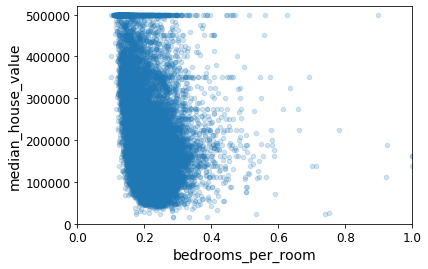

In [76]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value",
             alpha=0.2)
plt.axis([0, 1, 0, 520000])
plt.show()

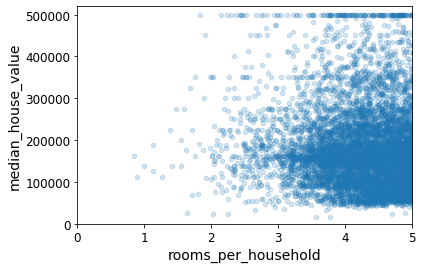

In [77]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [78]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16340.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16340.000000,16512.000000
mean,-119.566976,35.627757,28.570918,2648.943193,541.041493,1434.115734,502.672844,3.870716,206968.729530,5.422508,0.213284,3.064722
std,2.000519,2.134543,12.582281,2208.372267,427.316722,1130.309986,387.541495,1.900132,115414.844601,2.520931,0.058444,10.624706
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.750000
25%,-121.800000,33.930000,18.000000,1453.000000,297.000000,789.000000,280.000000,2.562500,119400.000000,4.430476,0.175584,2.429013
50%,-118.490000,34.250000,29.000000,2138.500000,438.000000,1170.000000,412.000000,3.529400,180400.000000,5.227170,0.203265,2.816122
75%,-118.010000,37.710000,37.000000,3158.000000,650.000000,1735.000000,608.000000,4.750375,264725.000000,6.051005,0.240129,3.278954
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### 4) Bereite die Daten für Machine-Learning Algorithmen vor

In [79]:
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy()

In [80]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16340.000000,16512.000000,16512.000000,16512.000000
mean,-119.566976,35.627757,28.570918,2648.943193,541.041493,1434.115734,502.672844,3.870716
std,2.000519,2.134543,12.582281,2208.372267,427.316722,1130.309986,387.541495,1.900132
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1453.000000,297.000000,789.000000,280.000000,2.562500
50%,-118.490000,34.250000,29.000000,2138.500000,438.000000,1170.000000,412.000000,3.529400
75%,-118.010000,37.710000,37.000000,3158.000000,650.000000,1735.000000,608.000000,4.750375
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100


-->

Um sicherzugehen, dass mit den vollständigen Daten gearbeitet wird, wird eine neue Kopie erstellt; wobei die Zahlvariable abgetrennt wird. 

### 4.1) Bereinigung fehlender Daten

In [81]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15607,-116.66,32.79,13.0,843.0,NaN,918.0,152.0,6.2152,<1H OCEAN
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,NEAR BAY
15975,-122.45,37.77,52.0,2602.0,NaN,1330.0,647.0,3.5435,NEAR BAY
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN
11096,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN


-->
Im Gesamten  gibt es nur 5 Datensätze bei den das Merkmal "total_bedrooms" nicht belegt ist.


In [82]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


-->
D.h. lösche die Datensätze mit fehlenden Werten.

In [83]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
15607,-116.66,32.79,13.0,843.0,918.0,152.0,6.2152,<1H OCEAN
738,-122.14,37.67,37.0,3342.0,1635.0,557.0,4.7933,NEAR BAY
15975,-122.45,37.77,52.0,2602.0,1330.0,647.0,3.5435,NEAR BAY
7668,-118.08,33.92,38.0,1335.0,1011.0,269.0,3.6908,<1H OCEAN
11096,-117.87,33.83,27.0,2287.0,1140.0,351.0,5.6163,<1H OCEAN


-->
D.h. lösche das Merkmal "total_bedrooms". Das wäre extrem unclever, da wir ja gesehen haben, dass sich mit diesem Merkmal ein vielversprechendes neues Merkmal bilden lässt. 

In [84]:
median = housing["total_bedrooms"].median() # median nur aus Trainingsdaten!! sonst: data leak -> overfitting
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15607,-116.66,32.79,13.0,843.0,438.0,918.0,152.0,6.2152,<1H OCEAN
738,-122.14,37.67,37.0,3342.0,438.0,1635.0,557.0,4.7933,NEAR BAY
15975,-122.45,37.77,52.0,2602.0,438.0,1330.0,647.0,3.5435,NEAR BAY
7668,-118.08,33.92,38.0,1335.0,438.0,1011.0,269.0,3.6908,<1H OCEAN
11096,-117.87,33.83,27.0,2287.0,438.0,1140.0,351.0,5.6163,<1H OCEAN


-->
D.h. ersetze die fehlenden Werte durch den Median aller Ausprägungen dieses Merkmals. Dies wird in der Praxis regelmäßig gemacht. 

In [85]:
housing["total_bedrooms"].fillna(median, inplace=True)

### 4.2) Umgang mit kategoriellen Merkmalen

Kategorielles Merkmal "ocean_proximity":

In [86]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
9950,INLAND
3547,<1H OCEAN
4448,<1H OCEAN
6984,<1H OCEAN
4432,<1H OCEAN
19456,INLAND
19688,INLAND
11951,INLAND
15270,NEAR OCEAN
10074,INLAND


In [87]:
from sklearn.preprocessing import OrdinalEncoder

In [88]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [4.],
       [1.]])

-->
Merkmale werden hier ordinal skaliert, d.h. Kategorie 1 bekommt die Ausprägung 0; Kategorie 2 die Ausprägung 2 usw. 

Das wäre hier aber nicht angemessen ! 

In [89]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [90]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

--> 
In Sklearn ist die One-Hot Kodierung einfach gemacht. Wie zu sehen ist, werden aus dem einen Merkmal 5 neue Merkmale. 

!! Hat ein Merkmal sehr viele Ausprägungen führt dies zu einer Explosion der Merkmale. Für diesen Fall gibt es noch weitere Möglichkeiten der Kodierung. 

In [91]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 4.3) Ergebnisse des Feature-Engineerings implementieren

In [92]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [93]:
from sklearn.preprocessing import FunctionTransformer

# Extrahiert die Indices der entsprechenden Merkmale
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

# Funktion um neue Merkmale zu erzeugen
def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

-->

Mit diesem Vorgehen werden die neuen Merkmale schlank und reproduzierbar erstellt.
Eine andere Möglichkeit bestet darin, es "von Hand" (s.o.) zu machen.  

In [94]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
9950,-122.33,38.38,28,1020,169,504,164,4.5694,INLAND,6.21951,3.07317
3547,-118.6,34.26,18,6154,1070,3010,1034,5.6392,<1H OCEAN,5.95164,2.91103
4448,-118.21,34.07,47,1346,383,1452,371,1.7292,<1H OCEAN,3.62803,3.91375
6984,-118.02,33.96,36,2071,398,988,404,4.6226,<1H OCEAN,5.12624,2.44554
4432,-118.2,34.08,49,1320,309,1405,328,2.4375,<1H OCEAN,4.02439,4.28354


### 4.4)  Pipeline aus Imputing, neuen Merkmalen, Skalierung der Merkmale

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
         ('imputer', SimpleImputer(strategy="median")),
         ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),    
    
         ('std_scaler', StandardScaler()),
         ])

housing_num = housing.select_dtypes(include=[np.number])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [96]:
housing_num_tr

array([[-1.38119534e+00,  1.28942183e+00, -4.53761462e-02, ...,
         3.16164288e-01,  7.95197399e-04, -7.26411523e-01],
       [ 4.83377271e-01, -6.40792431e-01, -8.40168684e-01, ...,
         2.09903463e-01, -1.44664485e-02, -6.03528748e-01],
       [ 6.78332584e-01, -7.29807166e-01,  1.46472968e+00, ...,
        -7.11852087e-01,  7.99128099e-02,  1.05819697e+00],
       ...,
       [-1.09626065e+00,  7.97498292e-01, -1.87339898e+00, ...,
         2.12580734e-01,  4.03620114e-02, -6.14681283e-01],
       [-1.43618273e+00,  1.00832267e+00,  1.22629191e+00, ...,
        -2.71036722e-01, -1.26488590e-01,  3.17352337e-02],
       [ 2.43432270e-01,  2.72779852e-01, -6.81210176e-01, ...,
         2.73206265e-02,  4.71904727e-02, -1.57788611e-01]])

--> 
Hier Pipeline für die numerischen Merkmale 

In [97]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [98]:
housing_prepared

array([[-1.38119534,  1.28942183, -0.04537615, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.48337727, -0.64079243, -0.84016868, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67833258, -0.72980717,  1.46472968, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.09626065,  0.79749829, -1.87339898, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43618273,  1.00832267,  1.22629191, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24343227,  0.27277985, -0.68121018, ...,  0.        ,
         0.        ,  0.        ]])

--> 

Volle Pipeline, inkl. One-Hot Encoding für kategorielles Merkmal



In [99]:
housing_prepared

array([[-1.38119534,  1.28942183, -0.04537615, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.48337727, -0.64079243, -0.84016868, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67833258, -0.72980717,  1.46472968, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.09626065,  0.79749829, -1.87339898, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43618273,  1.00832267,  1.22629191, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24343227,  0.27277985, -0.68121018, ...,  0.        ,
         0.        ,  0.        ]])

In [100]:
housing_prepared.shape

(16512, 16)

-->

Damit sind die Trainingsdaten für die Modellauswahl und das Training der Modelle vorbereitet ! 

### 5) Wähle ein Modell aus und trainiere es

### Einfache lineare Regession

In [101]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
# Probiere das Modell an einigen Datenpunkten aus_
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Vorhersagen:", lin_reg.predict(some_data_prepared))

Vorhersagen: [199918.46815408 286907.83136783 144230.73534745 259036.90436716
 163051.69545804]


Vergleich mit den tatsächlichen Werten:

In [103]:
print("Labels:", list(some_labels))

Labels: [287500.0, 271500.0, 191700.0, 219700.0, 114000.0]


In [104]:
PL=lin_reg.predict(some_data_prepared)
TL=list(some_labels)

print("Abweichungen in Prozent:", 100*(PL-TL)/TL)

Abweichungen in Prozent: [-30.46314151   5.67507601 -24.76226638  17.90482675  43.02780303]


-->

Genauigkeit nicht sehr berauschend :-( 

In [105]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68360.0115504344

-->

Mittlerer quadratischer Fehler
"median_housing_values" liegt in den meisten Bezirken zwischen 120.000
und 265.000 USD --> Fehler von ca. 68.000 ist unbefriedigend !!

In [106]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49548.85003362466

-->

Mittlerer absoluter Fehler 

### 5.1) Training von Modellen, hier lineare Regression

In [107]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

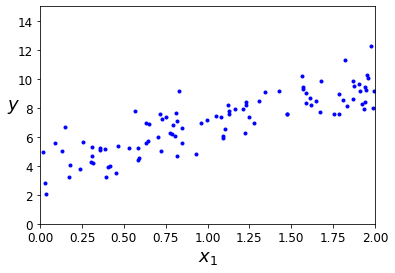

In [108]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Wende Normalengleichung an:

Note: Für Matrix-invertierung bzw. Skalarprodukt gibt es in Numpy entsprechende Funktionen

In [109]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

Optimale Thetawerte (= y-Achsenabschnitt und Steigung der Gerade):

In [110]:
theta_best

array([[3.96694684],
       [2.86499768]])

Zeichne die Regressionsgerade (= Das Modell) durch zwei Prognosewerte:

In [111]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.96694684],
       [9.6969422 ]])

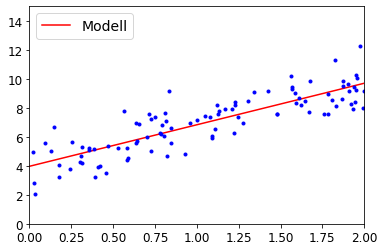

In [112]:
plt.plot(X_new, y_predict, "r-",label="Modell")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left", fontsize=14)
plt.show()

Ergänzung: Die Funktion linear_model aus Scikit-Learn macht (im Prinzip) genau dies in der Blackbox.
Allerdings wird die sog. Pseudoinverse anstatt der Inversen berechnet. Grund hierfür ist die bessere Skalierungseigenschaft für große Tainingsdaten ... 

Gradientenverfahren:

In [113]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.96694684],
       [2.86499768]])

Ergibt hier das selbe Ergebnis wie die Normalengleichung !! :-) 

Konvergenzverhalten in Abhängigkeit von der Lernrate:

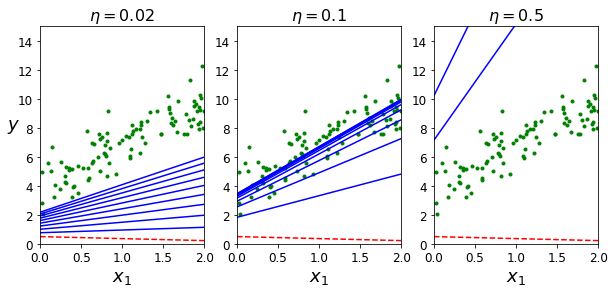

In [114]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "g.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()


### 5.2) Entscheidungsbaum als Modell

Idee:

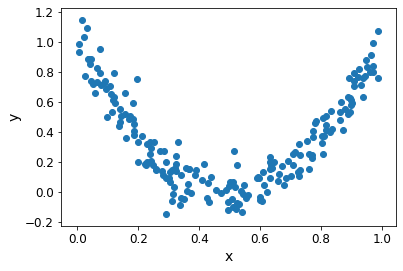

In [115]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [116]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

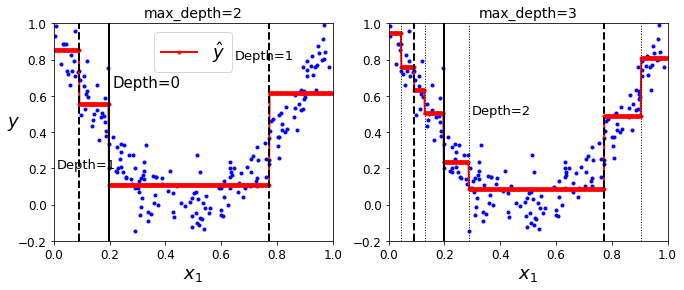

In [117]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

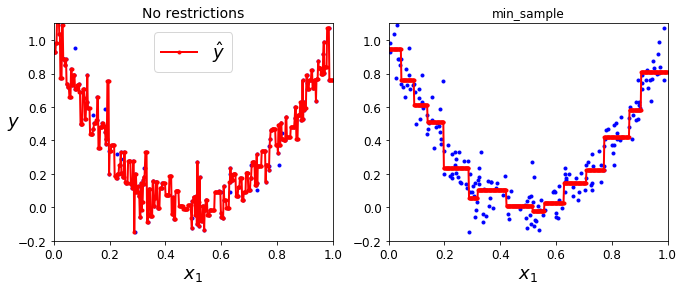

In [121]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_sample")
          

plt.show()

In [122]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [123]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

-->

Wow !!! ???

In [124]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [125]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mittelwert:", scores.mean())
    print("Standardabweichung:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70968.97586967 64454.05509228 68562.67189857 72196.6917087
 73801.26500588 70210.73504187 76820.70877435 72709.80695407
 73089.93483704 71261.18240352]
Mittelwert: 71407.6027585967
Standardabweichung: 3134.832620690183


In [126]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67763.80079135 66970.95065396 67832.9943296  68526.34352519
 70378.83166868 68168.7325672  70362.97641007 68763.24951881
 67648.46397347 71158.05205468]
Mittelwert: 68757.4395493009
Standardabweichung: 1327.8894081380308


-->

Auf den Validierungsdaten ("out-of-sample") ist der Entscheidungsbaum sogar noch schlechter als die lineare Regression. Allerdings besitzt der Algorithmus eine Reihe freier Parameter, die man über die Kreuzvalidierung festlegen kann. 

### Random Forest

In [127]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
#forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [128]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22260.14718984864

In [129]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49979.57304987 49971.27074221 50840.74939494 54775.57151498
 53810.90755373 52176.72639408 54799.44542096 53241.1475994
 55537.35309026 53882.1706602 ]
Mittelwert: 52901.49154206369
Standardabweichung: 1945.8173180561039


### 7) Optimiere das Modell

In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

--> 

Berechne ein Gitter aus unterschiedlichen Hyperparaemtern über eine 5-fache Kreuzvalidierung.

Die beste Kombination der Hyperparameter ist dann:

In [131]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [132]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Die Details der Gitterrechnung lassen sich ebenfals anschauen:

In [133]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65051.66850415168 {'max_features': 2, 'n_estimators': 3}
56329.89741533289 {'max_features': 2, 'n_estimators': 10}
53409.61301270308 {'max_features': 2, 'n_estimators': 30}
59907.408319610186 {'max_features': 4, 'n_estimators': 3}
52747.5308773725 {'max_features': 4, 'n_estimators': 10}
50545.37632952192 {'max_features': 4, 'n_estimators': 30}
58789.158804152874 {'max_features': 6, 'n_estimators': 3}
51962.69038739814 {'max_features': 6, 'n_estimators': 10}
50506.542892502664 {'max_features': 6, 'n_estimators': 30}
58296.45349667633 {'max_features': 8, 'n_estimators': 3}
52208.647599366246 {'max_features': 8, 'n_estimators': 10}
50260.75392798347 {'max_features': 8, 'n_estimators': 30}
62744.982839545286 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54793.734920901974 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59867.54541492117 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53092.43532156212 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [134]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.202745,0.029430,0.010275,0.002090,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.276647e+09,-4.253660e+09,...,-4.231720e+09,5.363565e+07,18,-1.160928e+09,-1.088797e+09,-1.121986e+09,-1.110306e+09,-1.060702e+09,-1.108544e+09,3.348603e+07
1,0.748795,0.157773,0.035257,0.013061,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.997579e+09,-3.203687e+09,...,-3.173057e+09,9.581426e+07,11,-6.153034e+08,-5.878004e+08,-5.765240e+08,-6.127594e+08,-5.652165e+08,-5.915207e+08,1.973501e+07
2,1.992945,0.221532,0.088273,0.015642,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.686085e+09,-2.865001e+09,...,-2.852587e+09,9.395986e+07,9,-4.522314e+08,-4.476608e+08,-4.310484e+08,-4.386709e+08,-4.279207e+08,-4.395064e+08,9.326135e+06
3,0.279853,0.015221,0.013963,0.003567,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.510237e+09,-3.397295e+09,...,-3.588898e+09,1.780328e+08,16,-1.015987e+09,-8.841484e+08,-1.000696e+09,-9.399777e+08,-9.449346e+08,-9.571486e+08,4.718333e+07
4,1.009452,0.139190,0.032515,0.007152,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.617753e+09,-2.770353e+09,...,-2.782302e+09,1.035985e+08,7,-5.498190e+08,-5.148962e+08,-5.278855e+08,-5.209760e+08,-5.057794e+08,-5.238712e+08,1.487043e+07
5,3.149137,0.457958,0.083380,0.005842,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.404835e+09,-2.569136e+09,...,-2.554835e+09,9.617004e+07,3,-4.083449e+08,-3.954383e+08,-3.925496e+08,-3.911516e+08,-3.829425e+08,-3.940854e+08,8.249794e+06
6,0.425618,0.062501,0.010981,0.002957,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.235598e+09,-3.529262e+09,...,-3.456165e+09,1.358122e+08,14,-9.409118e+08,-8.803392e+08,-9.425265e+08,-9.045060e+08,-9.376099e+08,-9.211787e+08,2.474248e+07
7,1.189531,0.055350,0.031321,0.004659,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.551448e+09,-2.740612e+09,...,-2.700121e+09,8.964565e+07,5,-5.152481e+08,-5.032649e+08,-5.016506e+08,-5.146593e+08,-4.939788e+08,-5.057603e+08,8.137927e+06
8,5.583663,1.736050,0.087765,0.007218,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.395881e+09,-2.543785e+09,...,-2.550911e+09,9.780298e+07,2,-3.986154e+08,-3.955413e+08,-3.866006e+08,-3.819740e+08,-3.792243e+08,-3.883911e+08,7.537598e+06
9,0.531982,0.033088,0.015560,0.003430,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.173314e+09,-3.218363e+09,...,-3.398476e+09,1.665796e+08,13,-9.165675e+08,-8.253322e+08,-8.810516e+08,-9.100666e+08,-9.270459e+08,-8.920128e+08,3.666781e+07


In [135]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

-->

Zufällige Suche in einem vorgegebenem Raster der Hyperparameter.

In [136]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

-->

Beste Parameter mit der zufälligen Suche 

In [137]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49349.04197083011 {'max_features': 7, 'n_estimators': 180}
51814.01251827752 {'max_features': 5, 'n_estimators': 15}
50880.09033322611 {'max_features': 3, 'n_estimators': 72}
50989.449437916985 {'max_features': 5, 'n_estimators': 21}
49401.69125992722 {'max_features': 7, 'n_estimators': 122}
50845.085256187696 {'max_features': 3, 'n_estimators': 75}
50714.520516663244 {'max_features': 3, 'n_estimators': 88}
49894.27885810386 {'max_features': 5, 'n_estimators': 100}
50549.224989133225 {'max_features': 3, 'n_estimators': 150}
64793.51265361651 {'max_features': 5, 'n_estimators': 2}


-->

Detailergebnisse der zufälligen Suche

In [138]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.04305109e-02, 6.55157526e-02, 4.17677560e-02, 1.46171949e-02,
       1.50750811e-02, 1.43927369e-02, 1.43149922e-02, 3.78845017e-01,
       5.27856315e-02, 1.06317336e-01, 5.62568875e-02, 7.41721278e-03,
       1.56676048e-01, 2.48514709e-04, 1.55014617e-03, 3.78918157e-03])

In [139]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37884501655547237, 'median_income'),
 (0.1566760482436535, 'INLAND'),
 (0.10631733630862082, 'pop_per_hhold'),
 (0.07043051087266465, 'longitude'),
 (0.0655157525729588, 'latitude'),
 (0.05625688752321367, 'bedrooms_per_room'),
 (0.052785631539859115, 'rooms_per_hhold'),
 (0.041767756020831735, 'housing_median_age'),
 (0.01507508112307096, 'total_bedrooms'),
 (0.01461719486044739, 'total_rooms'),
 (0.014392736925288948, 'population'),
 (0.0143149922221824, 'households'),
 (0.007417212784625376, '<1H OCEAN'),
 (0.0037891815668863833, 'NEAR OCEAN'),
 (0.001550146170793436, 'NEAR BAY'),
 (0.0002485147094305173, 'ISLAND')]

-->

RandomForest liefert auch Informationen über die wichtigsten Merkmale, d.h. die den größten Erklärungsbeitrag leisten


### Trainiere finales Modell und wende es auf die Testdaten an

In [103]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [104]:
final_rmse

47649.546835598434

95% Quantil des Fehlers über die t-Verteilung:

In [105]:
from scipy import stats

In [106]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45491.31580717, 49714.17115278])

# Geschaftt !!! 